<a href="https://colab.research.google.com/github/Bishal-Nengminja/Neural-Network-SMS-Text-Classifier/blob/main/Neural_Network_SMS_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import re

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

**2. Load the Dataset**

In [4]:
data = pd.read_csv('SPAM - Data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


**3. Preprocess the Data**\
a. Clean the Text

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

texts = [clean_text(msg) for msg in data['Message']]
labels = [0 if cat == 'ham' else 1 for cat in data['Category']]
texts = np.asarray(texts)
labels = np.asarray(labels)

b. Tokenization and Padding

In [6]:
max_features = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data_seq = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

c. Shuffle and Split Data

In [7]:
np.random.seed(42)
indices = np.arange(data_seq.shape[0])
np.random.shuffle(indices)
data_seq = data_seq[indices]
labels = labels[indices]

In [8]:
training_samples = int(0.8 * len(data_seq))
X_train = data_seq[:training_samples]
y_train = labels[:training_samples]
X_test = data_seq[training_samples:]
y_test = labels[training_samples:]

**4. Build the Improved Model**

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_len))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**5. Compile the Model**

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

**6. Train the Model with Validation**

In [11]:
num_epochs = 10
batch_size = 60

history = model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8451 - loss: 0.4564 - val_accuracy: 0.9383 - val_loss: 0.2053
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9548 - loss: 0.1682 - val_accuracy: 0.9742 - val_loss: 0.1057
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9809 - loss: 0.0909 - val_accuracy: 0.9776 - val_loss: 0.0779
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9839 - loss: 0.0799 - val_accuracy: 0.9798 - val_loss: 0.0638
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9892 - loss: 0.0499 - val_accuracy: 0.9809 - val_loss: 0.0657
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9934 - loss: 0.0352 - val_accuracy: 0.9832 - val_loss: 0.0627
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9947 - loss: 0.0272 - val_accuracy: 0.9821 - val_loss: 0.0639
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9937 - loss: 0.0273 - val_accuracy: 0.9709 - v

**7. Visualize Training Progress**

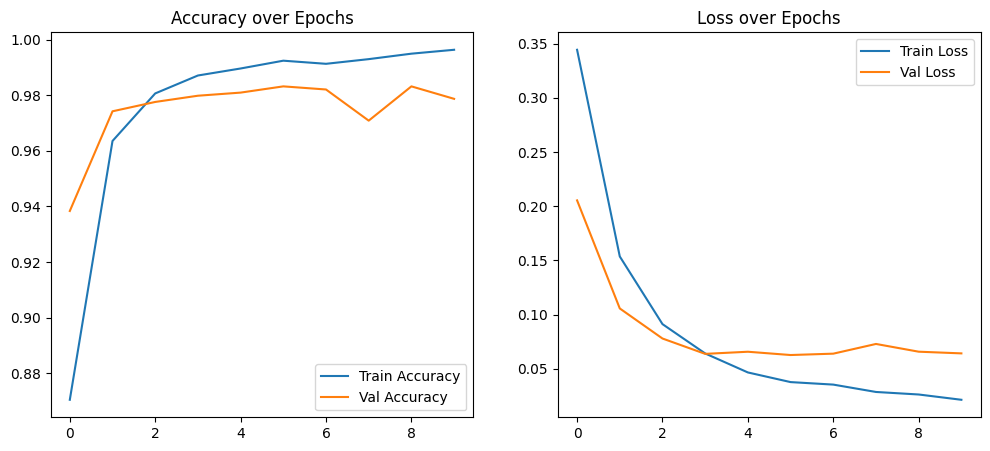

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

**8. Evaluate the Model**

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.2f}, Test accuracy: {acc:.2f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9823 - loss: 0.0733
Test loss: 0.09, Test accuracy: 0.98


**9. Detailed Metrics**

In [14]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [15]:
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       961
        spam       0.94      0.89      0.91       154

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[952   9]
 [ 17 137]]


**10. Predict New Messages (Console Interface)**

In [17]:
def predict_message(message):
    message_clean = clean_text(message)
    seq = tokenizer.texts_to_sequences([message_clean])
    pad = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=max_len)
    pred = model.predict(pad)
    return "spam" if pred[0][0] > 0.5 else "ham"

# Example usage:
msg = input("Enter an SMS message: ")
print("Prediction:", predict_message(msg))

Enter an SMS message: shil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: ham
